# Time Series Data Analysis

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import math
import datetime

In [3]:
def iterate_and_apply(dataframe, function, necesary_columns):
    perform = True
    step = 100000
    start = 0
    to = step
    
    while perform:
        new_columns = dataframe[start:to][necesary_columns].apply(function, axis=1)
        if len(new_columns) == 0:
            perform = False
        else:
            dataframe.update(new_columns)
        new_columns = None
        start += step
        to += step
    
    return dataframe


In [12]:
data.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

In [17]:
def abs_val(row):
    return abs(row['pickup_longitude'] - (-98.116669) < 0.001) and (abs(row['pickup_latitude'] - 40.772568) < 0.001)
#     return abs(f1 - f2) <= 0.02

In [14]:
data = pd.read_csv('trip_data_1.csv', skipinitialspace=True)

In [ ]:
data = data.apply(lambda row: abs_val(row),axis=1) 

In [7]:
datetime_necesary_columns = ['pickup_datetime']
datetime_column_names = ['pickup_month', 'pickup_weekday', 'pickup_day', 'pickup_time_in_mins', 'pickup_hours']

# It says if a day is a holiday in NYC.
#def is_in_annual_holidays(the_day):
    #return annual_holidays[(annual_holidays.Month == the_day.month) & (annual_holidays.Day == the_day.day)].shape[0]

# It calculates data related with 'pickup_datetime'.
def calculate_datetime_extra(row):
    dt = datetime.datetime.strptime(row.pickup_datetime, '%Y-%m-%d %H:%M:%S')
    pickup_month = dt.month
    pickup_weekday = dt.weekday()
    pickup_day = dt.day
    pickup_hours = dt.hour
    pickup_time_in_mins = dt.minute
    #pickup_non_working_today = int((pickup_weekday == 5) or (pickup_weekday == 6) or is_in_annual_holidays(dt))
    #pickup_non_working_tomorrow = int((pickup_weekday == 4) or (pickup_weekday == 5) or
                                      #is_in_annual_holidays(dt + datetime.timedelta(days=1)))
    
    return pd.Series({
        datetime_column_names[0]: pickup_month,
        datetime_column_names[1]: pickup_weekday,
        datetime_column_names[2]: pickup_day,
        datetime_column_names[3]: pickup_time_in_mins,
        datetime_column_names[4]: pickup_hours,

    })

def iterate_and_apply(dataframe, function, necesary_columns):
    perform = True
    step = len(dataframe.index)
    start = 0
    to = step
    
    while perform:
        new_columns = dataframe[start:to][necesary_columns].apply(function, axis=1)
        if len(new_columns) == 0:
            perform = False
        else:
            dataframe.update(new_columns)
        new_columns = None
        start += step
        to += step
    
    return dataframe

In [ ]:
for column in datetime_column_names:
    data[column] = np.nan

f_df = iterate_and_apply(data, calculate_datetime_extra, datetime_necesary_columns)

f_df.shape

In [11]:
data.shape

(0, 14)

In [6]:
def label_tip(row):
    return datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S').hour

In [8]:
data['pickup_hours'] = data.apply(lambda row: label_tip(row),axis=1) 

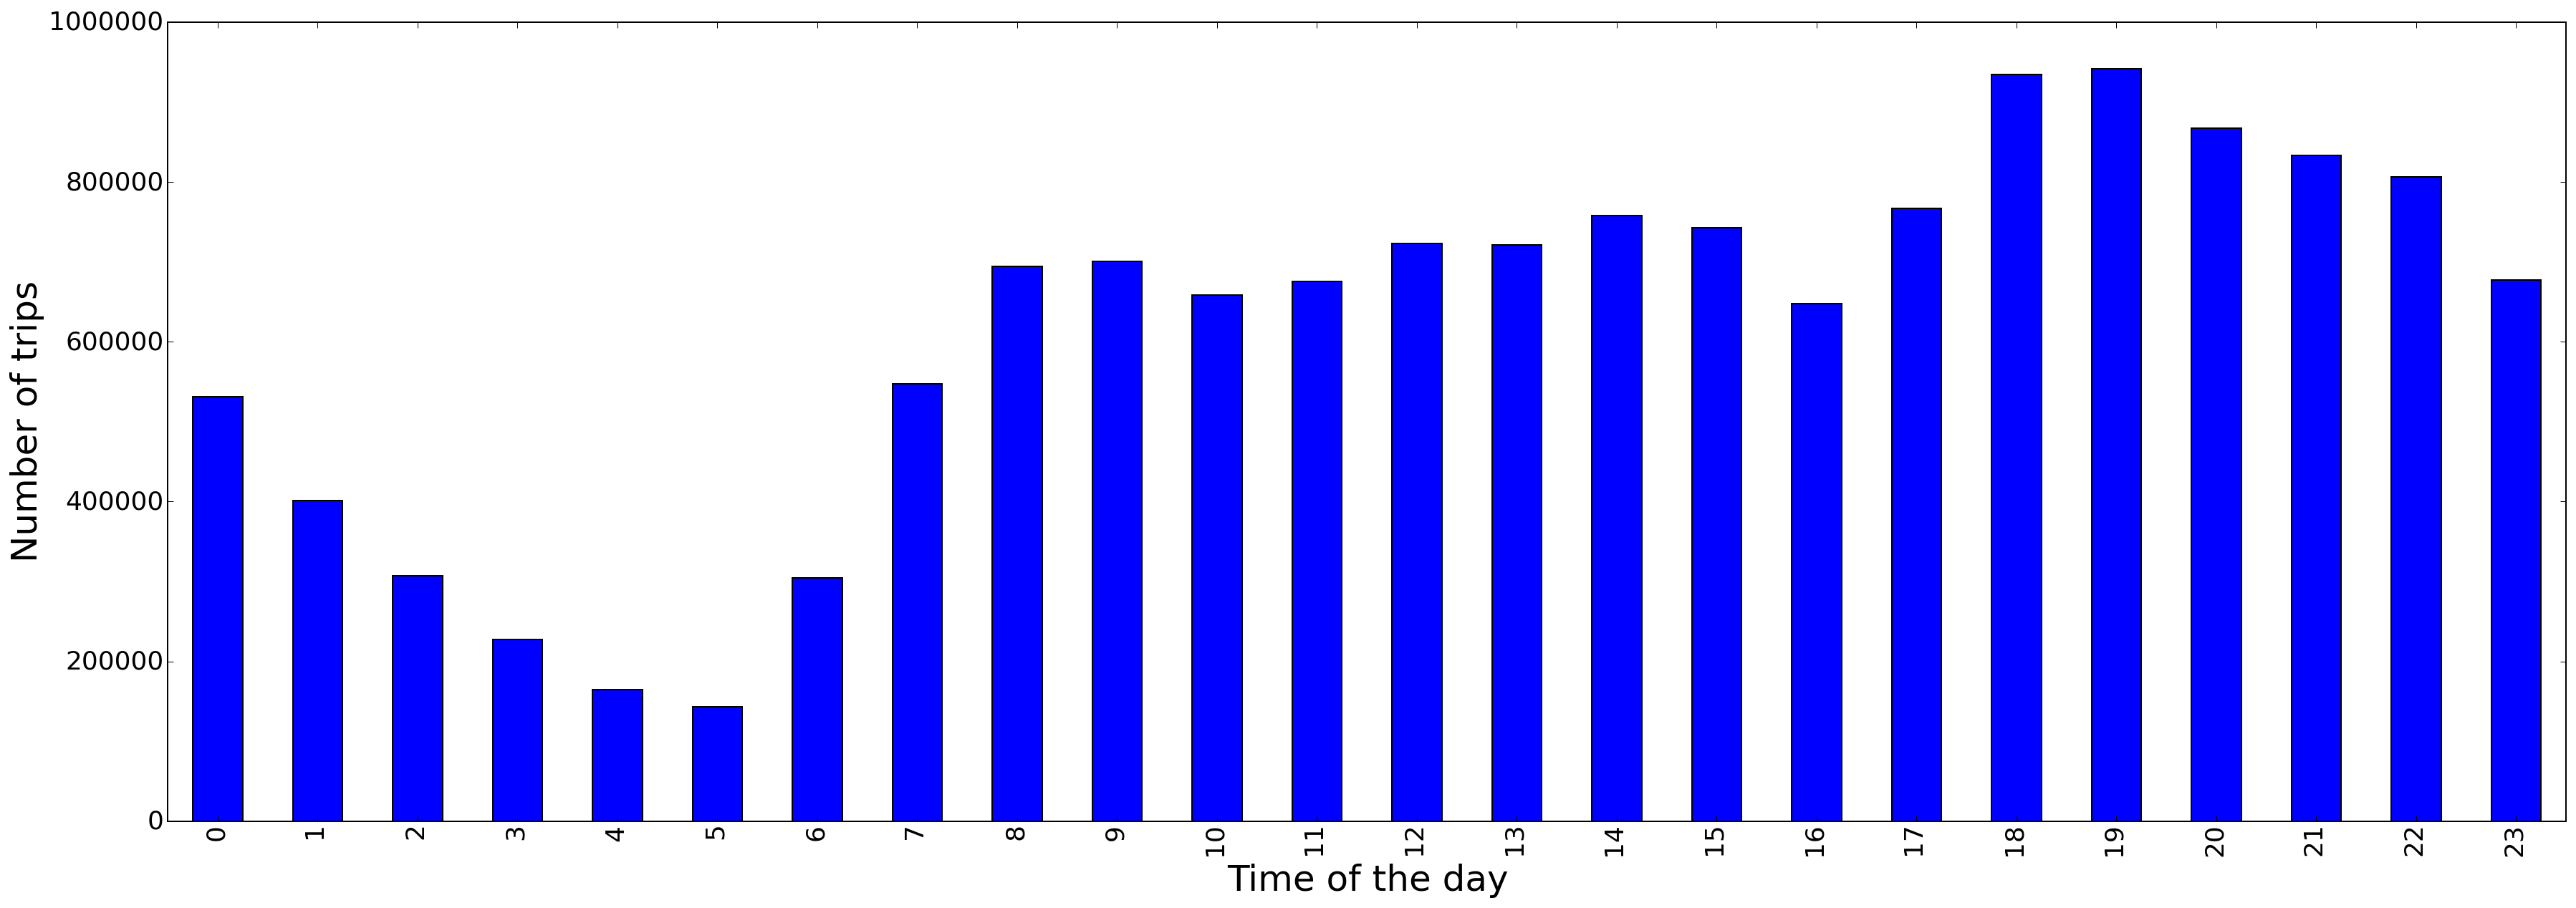

In [14]:
bx = data.groupby(['pickup_hours']).size().plot(kind='bar', figsize=(30, 10))
bx.set_xlabel('Time of the day', fontsize=25)
bx.set_ylabel('Number of trips', fontsize=25)
bx.tick_params(labelsize=18)
plt.savefig('time_of_the_day.eps', format='eps', dpi=1000)